In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('african_econ_crises.csv')

In [3]:
data.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [4]:
data.shape

(1059, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   case                             1059 non-null   int64  
 1   cc3                              1059 non-null   object 
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   systemic_crisis                  1059 non-null   int64  
 5   exch_usd                         1059 non-null   float64
 6   domestic_debt_in_default         1059 non-null   int64  
 7   sovereign_external_debt_default  1059 non-null   int64  
 8   gdp_weighted_default             1059 non-null   float64
 9   inflation_annual_cpi             1059 non-null   float64
 10  independence                     1059 non-null   int64  
 11  currency_crises                  1059 non-null   int64  
 12  inflation_crises    

In [6]:
# plt.figure(figsize=(12,6),dpi=120)
# sns.heatmap(data.isnull(),yticklabels=False,cbar=False)
# plt.show()

In [7]:
arr =['cc3','country','systemic_crisis','domestic_debt_in_default','sovereign_external_debt_default',
      'independence','currency_crises','inflation_crises','banking_crisis']

for i in arr:
    print(f' In {i} column:')
    print(data[i].unique())
    print()

 In cc3 column:
['DZA' 'AGO' 'CAF' 'CIV' 'EGY' 'KEN' 'MUS' 'MAR' 'NGA' 'ZAF' 'TUN' 'ZMB'
 'ZWE']

 In country column:
['Algeria' 'Angola' 'Central African Republic' 'Ivory Coast' 'Egypt'
 'Kenya' 'Mauritius' 'Morocco' 'Nigeria' 'South Africa' 'Tunisia' 'Zambia'
 'Zimbabwe']

 In systemic_crisis column:
[1 0]

 In domestic_debt_in_default column:
[0 1]

 In sovereign_external_debt_default column:
[0 1]

 In independence column:
[0 1]

 In currency_crises column:
[0 1 2]

 In inflation_crises column:
[0 1]

 In banking_crisis column:
['crisis' 'no_crisis']



In [8]:
b = data.banking_crisis.copy()

In [9]:
a=[]
ze=0
be=0
for i in b:
    if i=='crisis':
        a.append(1)
        ze+=1
    else:
        a.append(0)
        be+=1

In [10]:
print('Crisis count:',ze)
print('No Crisis count:',be)

Crisis count: 94
No Crisis count: 965


In [11]:
a = np.array(a)

In [12]:
a = pd.DataFrame(a,columns=['target_cpy'])

In [13]:
data = pd.concat([data,a],axis =1)

In [14]:
data.columns

Index(['case', 'cc3', 'country', 'year', 'systemic_crisis', 'exch_usd',
       'domestic_debt_in_default', 'sovereign_external_debt_default',
       'gdp_weighted_default', 'inflation_annual_cpi', 'independence',
       'currency_crises', 'inflation_crises', 'banking_crisis', 'target_cpy'],
      dtype='object')

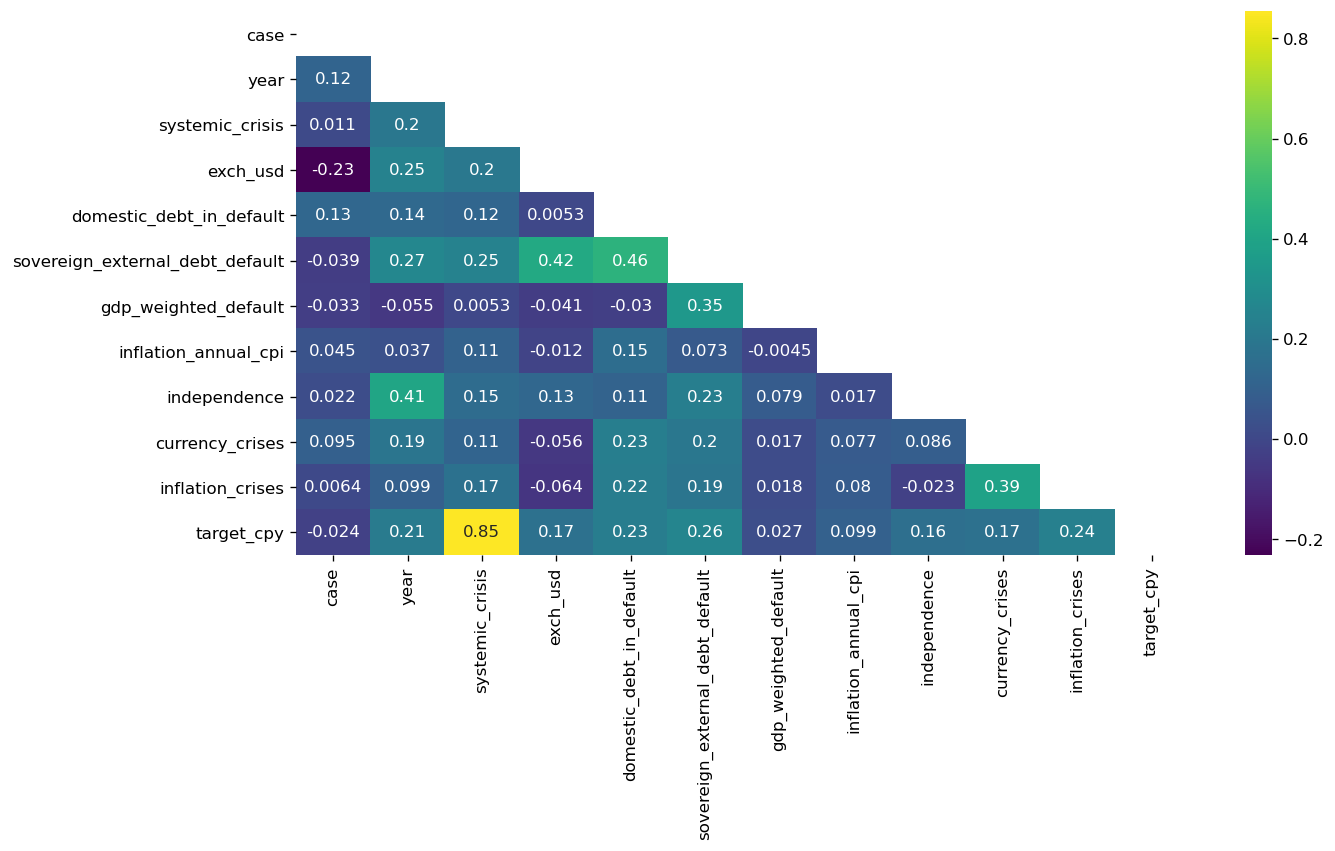

In [15]:
corr = data.corr()

mask = np.triu(np.ones_like(corr,dtype=bool))

plt.figure(figsize=(12,6),dpi = 120)
sns.heatmap(data.corr(),annot=True,cmap='viridis',mask=mask)
plt.show()

In [16]:
data.drop(['case','gdp_weighted_default','inflation_annual_cpi'],axis=1,inplace=True)
#These feature are not that important

In [17]:
data.head()

,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,independence,currency_crises,inflation_crises,banking_crisis,target_cpy
0,DZA,Algeria,1870,1,0.052264,0,0,0,0,0,crisis,1
1,DZA,Algeria,1871,0,0.052798,0,0,0,0,0,no_crisis,0
2,DZA,Algeria,1872,0,0.052274,0,0,0,0,0,no_crisis,0
3,DZA,Algeria,1873,0,0.051680,0,0,0,0,0,no_crisis,0
4,DZA,Algeria,1874,0,0.051308,0,0,0,0,0,no_crisis,0


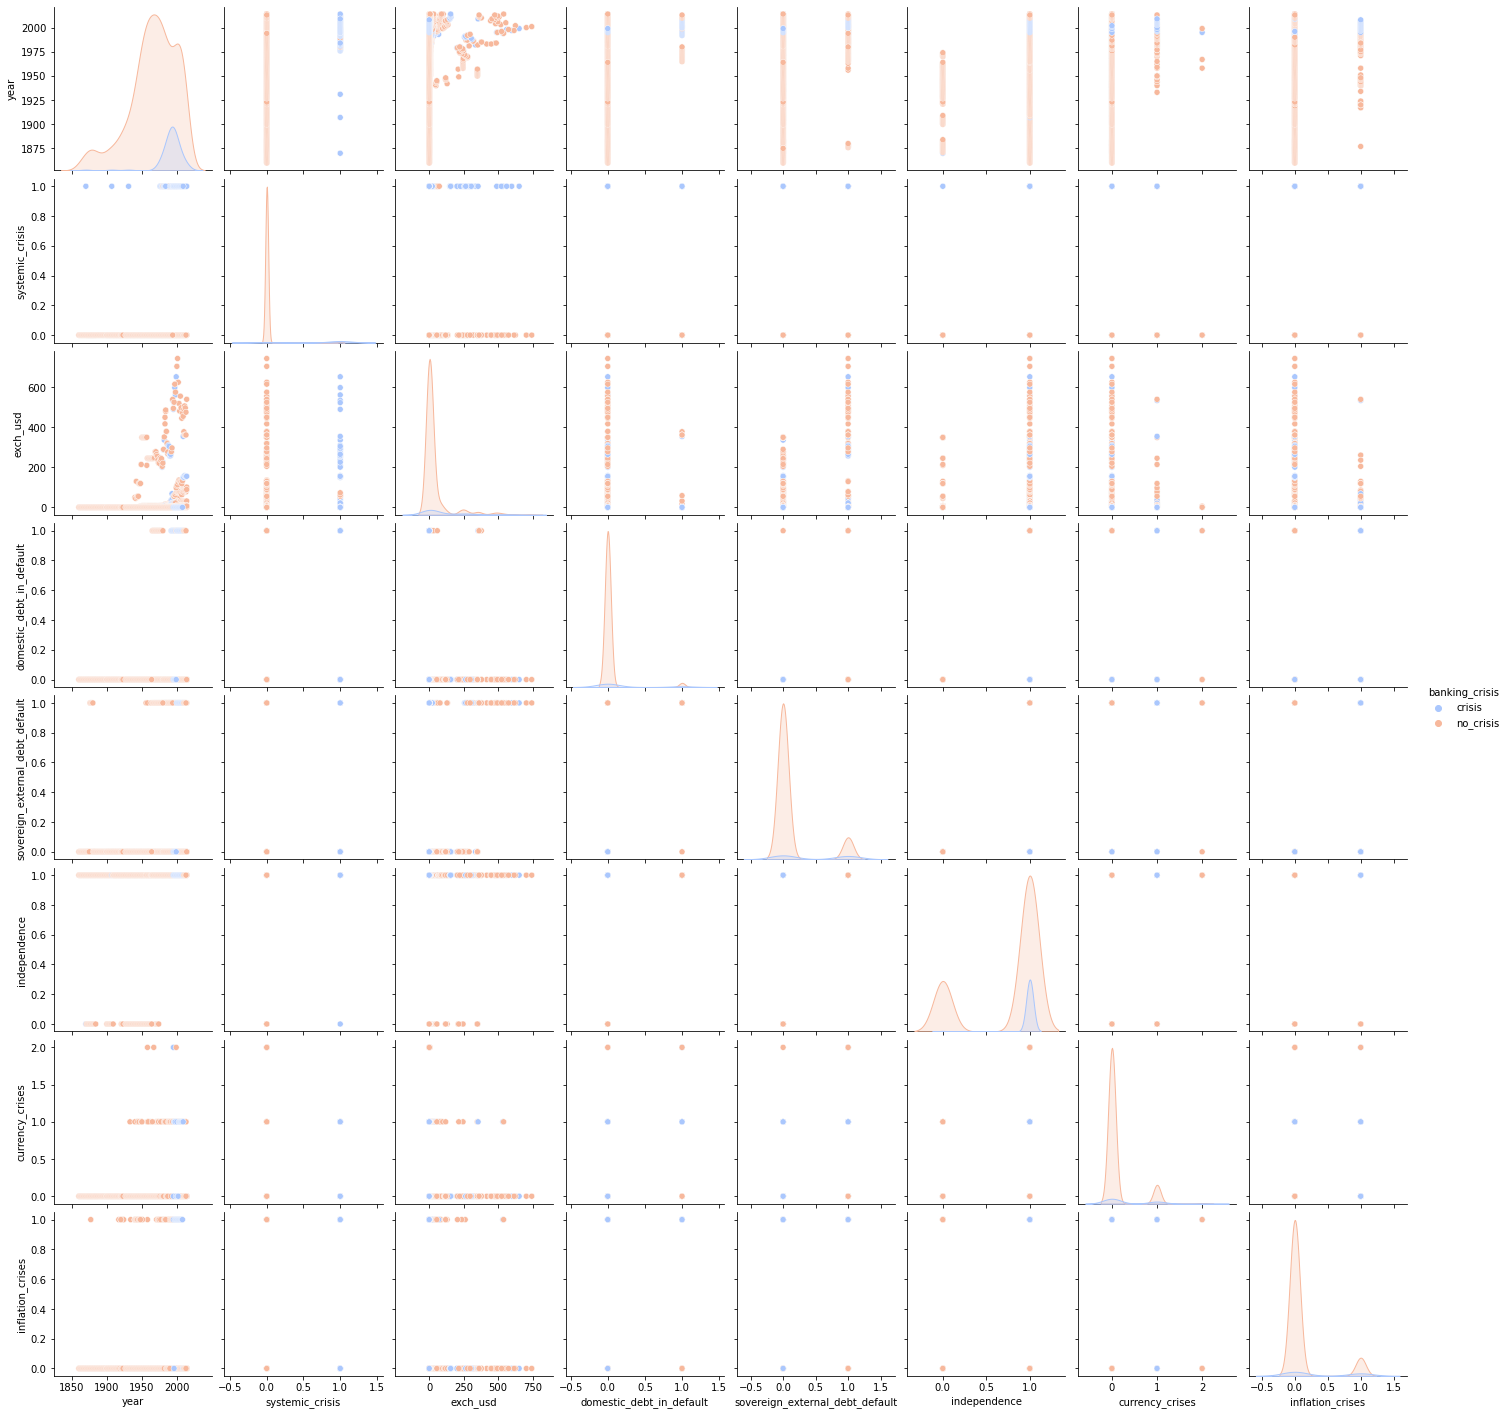

In [18]:
sns.pairplot(data.drop(['target_cpy'],axis=1),hue='banking_crisis',palette='coolwarm')
plt.show()

In [24]:
X = data.drop(['banking_crisis','target_cpy'],axis=1)

In [26]:
y = data['banking_crisis']

In [19]:
from sklearn.model_selection import train_test_split

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [28]:
rfc = RandomForestClassifier()